<a href="https://colab.research.google.com/github/Samiksha2602/CODE-CLAUSE-/blob/main/STOCK_MARKET_PREDICTION%20code%20clause%20internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


In [6]:
dataset=pd.read_csv('/content/YESBANK__EQ__NSE__NSE__MINUTE.csv')

In [7]:
dataset.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,232.14,232.14,230.66,231.55,79985.0
1,2017-01-02 09:16:00+05:30,231.63,231.99,231.44,231.91,29650.0
2,2017-01-02 09:17:00+05:30,231.72,232.08,231.62,231.62,40365.0
3,2017-01-02 09:18:00+05:30,231.60,231.71,230.93,231.20,57680.0
4,2017-01-02 09:19:00+05:30,231.39,231.39,230.51,230.60,55305.0


In [8]:
dataset.tail()

,timestamp,open,high,low,close,volume
34512,2017-05-18 09:27:00+05:30,285.88,286.00,285.48,285.87,143990.0
34513,2017-05-18 09:28:00+05:30,285.98,286.31,285.87,286.27,94890.0
34514,2017-05-18 09:29:00+05:30,286.27,286.48,286.06,286.40,74870.0
34515,2017-05-18 09:30:00+05:30,286.35,286.80,286.33,286.68,75480.0
34516,2017-05-18 09:31:00+05:30,286.68,286.80,286.20,NaN,NaN


In [11]:
dataset.shape

(34517, 6)

In [13]:
dataset.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        1
volume       1
dtype: int64

In [14]:
dataset.isna().any()

timestamp    False
open         False
high         False
low          False
close         True
volume        True
dtype: bool

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34517 entries, 0 to 34516
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  34517 non-null  object 
 1   open       34517 non-null  float64
 2   high       34517 non-null  float64
 3   low        34517 non-null  float64
 4   close      34516 non-null  float64
 5   volume     34516 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [17]:
dataset.describe()

,open,high,low,close,volume
count,34517.000000,34517.000000,34517.000000,34516.000000,3.451600e+04
mean,293.017104,293.146459,292.887427,293.017151,3.117580e+04
std,23.184934,23.189097,23.182232,23.185220,5.502275e+04
min,226.500000,226.640000,226.260000,226.530000,1.500000e+02
25%,279.420000,279.560000,279.300000,279.420000,8.188750e+03
50%,292.600000,292.760000,292.480000,292.600000,1.614500e+04
75%,310.470000,310.600000,310.380000,310.470000,3.303625e+04
max,330.070000,330.380000,329.870000,330.130000,2.172135e+06


In [18]:
print(len(dataset))

34517


<Axes: >

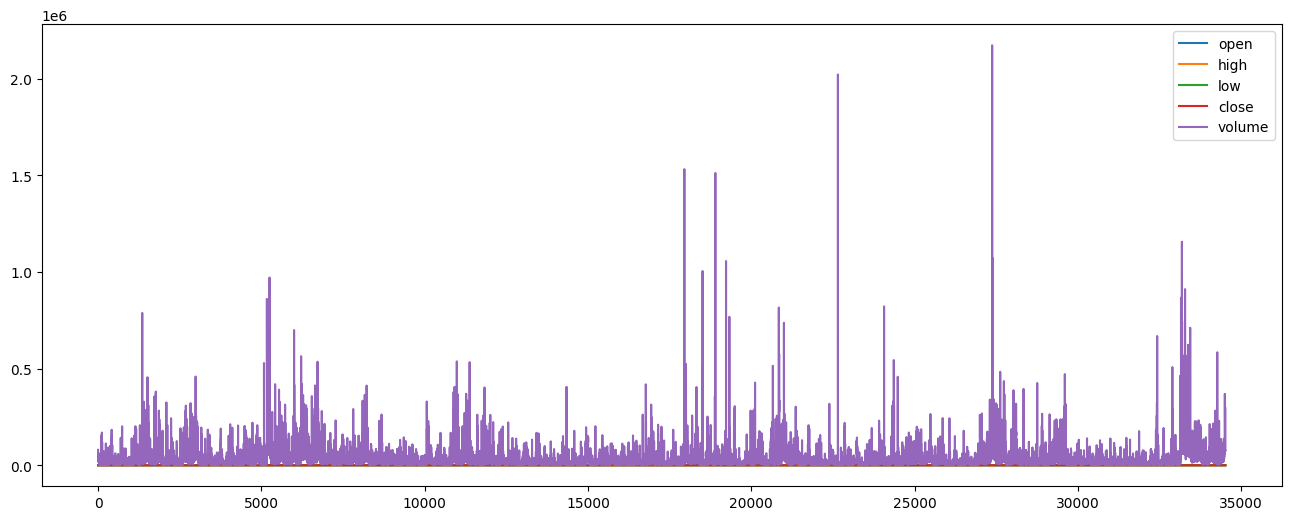

In [20]:
dataset.plot(figsize=(16,6))

In [21]:
X=dataset[['high','low','volume','open']]

In [24]:
Y=dataset['close']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_test,Y_train=train_test_split(X,Y,random_state=0)

In [26]:
X_train.shape

(25887, 4)

In [28]:
X_test.shape

(8630, 4)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [45]:
np.isnan(Y)

0        False
1        False
2        False
3        False
4        False
         ...  
34512    False
34513    False
34514    False
34515    False
34516     True
Name: close, Length: 34517, dtype: bool

In [46]:
np.where(np.isnan(Y))

(array([34516]),)

In [47]:
np.nan_to_num(Y)

array([231.55, 231.91, 231.62, ..., 286.4 , 286.68,   0.  ])

In [57]:
print(X_test)

         high     low   volume    open
28164  310.40  309.97  39855.0  310.00
17442  293.22  292.85  71170.0  293.22
188    228.07  227.92   6845.0  227.93
18341  306.48  306.13  20495.0  306.44
22637  309.94  309.78   1495.0  309.94
...       ...     ...      ...     ...
24716  311.41  311.07  28460.0  311.41
4494   265.15  264.97  28925.0  264.97
10332  280.56  280.38   9120.0  280.39
30258  327.59  327.25  22935.0  327.59
20717  295.40  295.11  11550.0  295.19

[8630 rows x 4 columns]


In [61]:
predicted=(X_test)
predicted.shape

(8630, 4)

In [65]:

dframe=(Y_test)

In [68]:
print(dframe)

10827    282.22
3268     265.32
8834     278.70
10316    280.63
10153    282.82
          ...  
20757    297.57
32103    320.11
30403    325.66
21243    306.34
2732     261.14
Name: close, Length: 25887, dtype: float64


In [69]:
dframe.head(25)

10827    282.22
3268     265.32
8834     278.70
10316    280.63
10153    282.82
9634     278.12
2764     261.37
2731     261.27
22933    308.66
28098    307.73
21180    306.30
20587    293.53
22121    307.28
28061    306.63
8064     277.51
7108     279.76
24144    312.98
6284     271.72
2429     251.82
9928     279.99
5076     268.38
32581    319.36
219      228.03
25714    324.37
30185    328.54
Name: close, dtype: float64

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [72]:
import math

In [74]:
graph=dframe.head(20)

<Axes: >

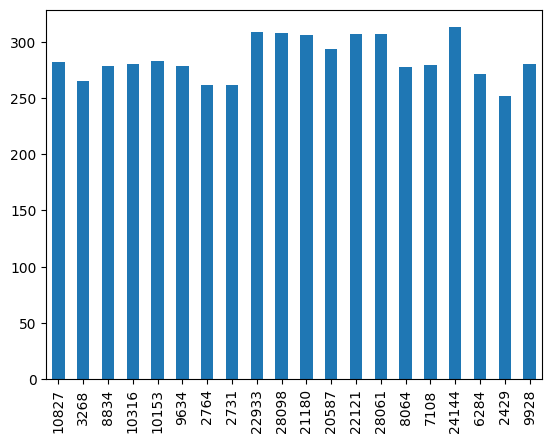

In [75]:
graph.plot(kind='bar')